# Decision Tree iris multi
---

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import myutils as my

## 데이터 준비

In [5]:
X_train, X_test, y_train, y_test = my.get_iris()

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

In [6]:
X_train = X_train.values
X_test = X_test.values
y_train = y_train.values
y_test = y_test.values

In [7]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier(random_state=2022)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

1.0

## GridSearch

In [13]:
from sklearn.model_selection import GridSearchCV

params = {
    'min_samples_leaf':range(1,10),
    'max_depth':range(3,10),
    'min_samples_split':range(3,10)
}

clf = DecisionTreeClassifier(random_state=2022)
gs = GridSearchCV(clf, params, cv=3, verbose=3)
gs.fit(X_train, y_train)

Fitting 3 folds for each of 441 candidates, totalling 1323 fits
[CV 1/3] END max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=0.950 total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=1, min_samples_split=3;, score=0.950 total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.950 total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=1, min_samples_split=4;, score=0.950 total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=1.000 total time=   0.0s
[CV 2/3] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.950 total time=   0.0s
[CV 3/3] END max_depth=3, min_samples_leaf=1, min_samples_split=5;, score=0.950 total time=   0.0s
[CV 1/3] END max_depth=3, min_samples_leaf=1,

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': range(3, 10),
                         'min_samples_leaf': range(1, 10),
                         'min_samples_split': range(3, 10)},
             verbose=3)

In [14]:
gs.best_params_

{'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [15]:
gs.best_score_

0.9666666666666667

## 최종

In [16]:
clf = DecisionTreeClassifier(max_depth=3, min_samples_leaf=1, 
                             min_samples_split=3, random_state=2022)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=3, random_state=2022)

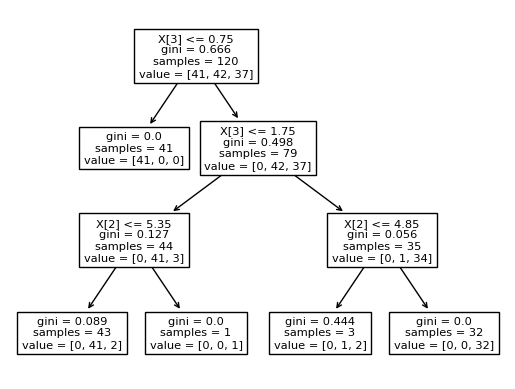

In [19]:
from sklearn.tree import plot_tree

plot_tree(clf)
plt.show()

In [17]:
clf.score(X_train, y_train)

0.975

In [ ]:
clf.score(X_test, y_test)